# Analysis of Umbrella Sampling Simulations
potentialof mean force for a sodium - chloride ion pair in water as a function of its separation is shown below:

![img](nacl_pmd.png)

Ref: [Baumketner, J Chem Phys. 2009 Mar 14; 130(10): 104106.](https://doi.org/10.1063%2F1.3081138) 

The lowest energy state is when the ions are in contact. As the distance increases the energy rises quickly to a maximum, then drops back, as the situation is reached where a first solvation shell of water can be formed between them. A second local maximum, and then minimum, can also be seen, corresponding to the formation of a complete second solvation shell. The Na-Cl ion pair therefore serves as a very simple but relevant proxy for many more complex biological systems - e.g. protein-ligand complexes - where a bound state is separated from the unbound state by a significant enertgy barrier, and a number of metastable states may also exist along the unbinding pathway.

Before we get going, it's important to remember that the potential of mean force, as shown here, is not the same as the distance-dependence of the free energy. The PMF does not take into account that as the distance between the ions increases, the number of possible states with the same ion-ion separation increases (they form the surface of a sphere of increasing surface area). To convert a free energy plot to a PMF, we must make this volume correction (a factor of (4/3)\*pi\*r^3).

## Analysis of data from "vanilla" MD simulations
First let's convince ourselves that some form of enhanced sampling is neccessary for this system. In the `/results` folder are data files from two 200ps "vanilla" MD simulations of the NaCl system, one of which was begun from a configuration where the ions were separated by just 2.6 Angstroms, and the other from a configuration where the separation was 4.5 Angstroms - i.e., either side of a major barrier.

The code cells below show how yopu can extract the Na - Cl distances in these files, then use `numpy` and `matplotlib` to transform the data into free energy plots and PMFs. Do either or both simulations yield converged samplings that generate PMF plots close to those in the literature?

In [1]:
# Import the required packages:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Start with the data from the simulation begun from the contacting ion pair:
with open('results/nacl_2.6_md1.dist') as f:
    data = f.readlines()

# The file has two columns of data: the snapshot number, and the Na-Cl separation (in Angstroms).
# There is also a header row to skip.
distances = [float(l.split()[1]) for l in data[1:]]

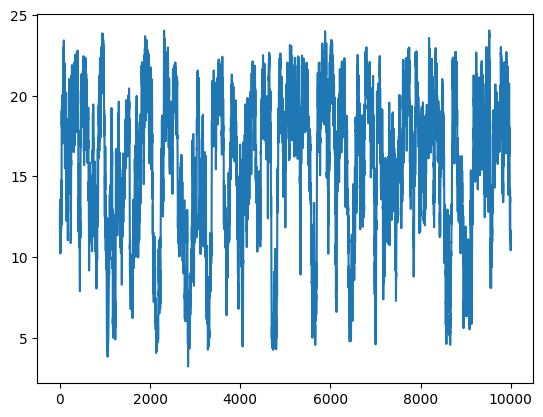

In [3]:
# Look at how the Na-Cl separation varies over time:
plt.plot(np.array(dist))

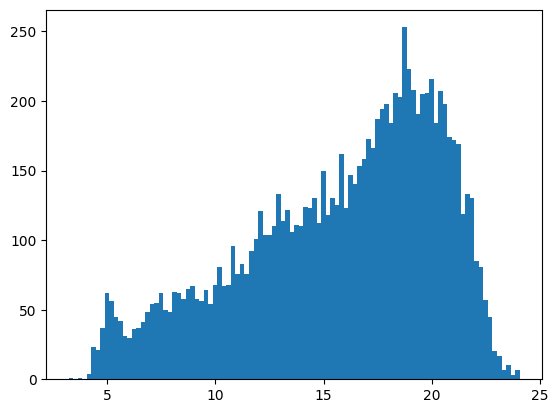

In [4]:
out = plt.hist(dist, bins=100)

In [5]:
print(out[1])

[ 3.219     3.427251  3.635502  3.843753  4.052004  4.260255  4.468506
  4.676757  4.885008  5.093259  5.30151   5.509761  5.718012  5.926263
  6.134514  6.342765  6.551016  6.759267  6.967518  7.175769  7.38402
  7.592271  7.800522  8.008773  8.217024  8.425275  8.633526  8.841777
  9.050028  9.258279  9.46653   9.674781  9.883032 10.091283 10.299534
 10.507785 10.716036 10.924287 11.132538 11.340789 11.54904  11.757291
 11.965542 12.173793 12.382044 12.590295 12.798546 13.006797 13.215048
 13.423299 13.63155  13.839801 14.048052 14.256303 14.464554 14.672805
 14.881056 15.089307 15.297558 15.505809 15.71406  15.922311 16.130562
 16.338813 16.547064 16.755315 16.963566 17.171817 17.380068 17.588319
 17.79657  18.004821 18.213072 18.421323 18.629574 18.837825 19.046076
 19.254327 19.462578 19.670829 19.87908  20.087331 20.295582 20.503833
 20.712084 20.920335 21.128586 21.336837 21.545088 21.753339 21.96159
 22.169841 22.378092 22.586343 22.794594 23.002845 23.211096 23.419347
 23.6275

In [6]:
bins = out[0]
edges = out[1]
centres = (edges[:100] + edges[1:]) / 2
vols = [np.pi*(edges[i+1]**3 - edges[i]**3)*4/3 for i in range(100)]

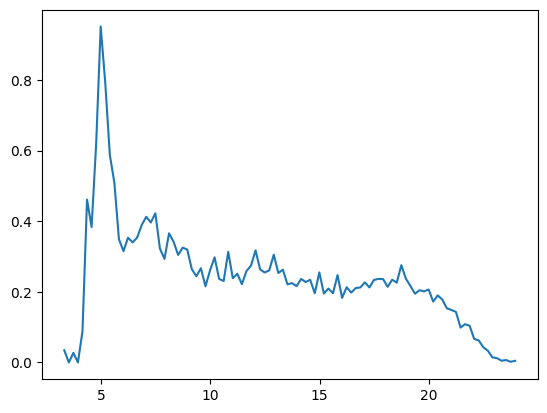

In [7]:
plt.plot(centres, bins/vols)

/var/folders/v0/vzwwlsr12vvbmyxvhlrhgpf80000gp/T/ipykernel_16666/2268183092.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(centres, -np.log(bins/vols))


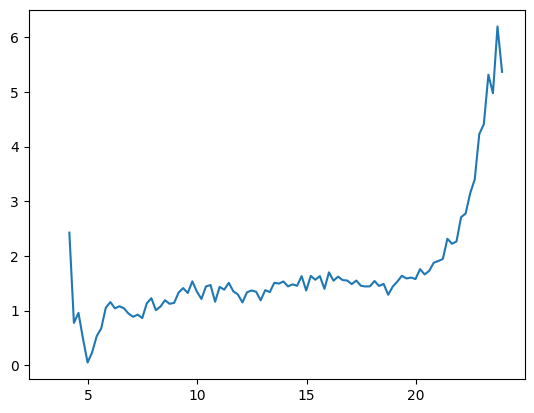

In [8]:
plt.plot(centres, -np.log(bins/vols))

In [9]:
data = np.loadtxt('freefile')

In [10]:
print(data.shape)

(100, 5)


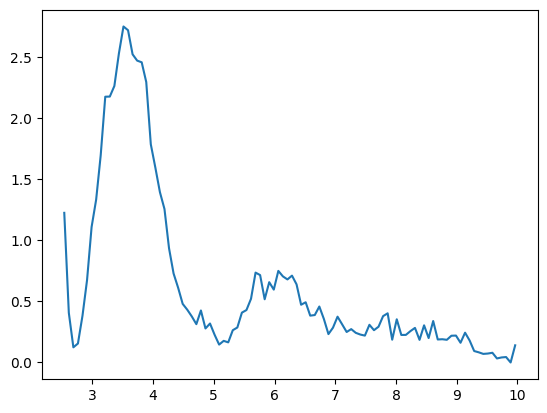

In [11]:
plt.plot(data[:, 0], data[:, 1])

In [16]:
gfac = [np.pi * r**3 * 4 / 3 for r in data[:, 0]]

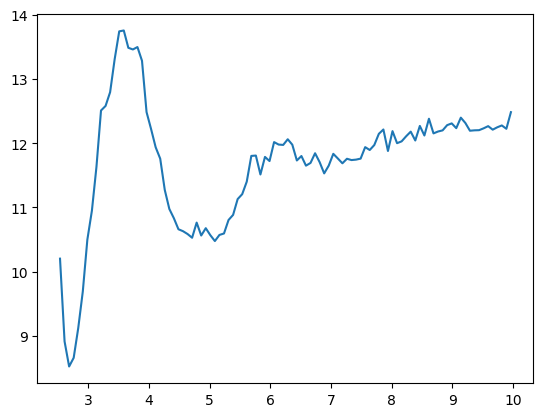

In [21]:
plt.plot(data[:, 0], -np.log(data[:, 3] / gfac))